In [1]:
!pip install numpy pandas matplotlib seaborn scikit-learn scipy

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from scipy.stats import zscore
from scipy.spatial.distance import mahalanobis
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Load data
data = pd.read_csv('/content/heart_disease_uci.csv')




In [7]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values[missing_values > 0])

Missing values in each column:
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
dtype: int64


In [9]:
data_cleaned = data.dropna()

In [10]:
features = ["age", "trestbps", "chol", "thalch", "oldpeak"]
X = data_cleaned[features]
y = (data_cleaned["num"] > 0).astype(int)

In [11]:
# Data Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
# 1. Z-Score Method
def z_score_method(X):
    z_scores = np.abs(zscore(X))
    return (z_scores > 3).any(axis=1)

In [15]:

# 2. Mahalanobis Distance
def mahalanobis_distance(X):
    mean = np.mean(X, axis=0)
    cov = np.cov(X, rowvar=False)
    inv_cov = np.linalg.inv(cov)
    distances = [mahalanobis(x, mean, inv_cov) for x in X]
    return np.array(distances) > 20  # Threshold of 20

In [16]:
# 3. Local Outlier Factor
def local_outlier_factor(X):
    lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
    return lof.fit_predict(X) == -1  # -1 indicates an outlier

In [17]:
# 4. One-Class SVM
def one_class_svm(X):
    svm = OneClassSVM(kernel='rbf', nu=0.1)
    svm.fit(X)
    return svm.predict(X) == -1  # -1 indicates an outlier

In [18]:
# 5. Isolation Forest
def isolation_forest(X):
    iso_forest = IsolationForest(contamination=0.1, random_state=42)
    iso_forest.fit(X)
    return iso_forest.predict(X) == -1  # -1 indicates an outlier

In [19]:
# Detect anomalies using all methods
z_score_anomalies = z_score_method(X_scaled)
mahalanobis_anomalies = mahalanobis_distance(X_scaled)
lof_anomalies = local_outlier_factor(X_scaled)
svm_anomalies = one_class_svm(X_scaled)
iso_forest_anomalies = isolation_forest(X_scaled)

In [20]:
# Compile results into a DataFrame for comparison
results = pd.DataFrame({
    'Z-Score': z_score_anomalies,
    'Mahalanobis': mahalanobis_anomalies,
    'LOF': lof_anomalies,
    'One-Class SVM': svm_anomalies,
    'Isolation Forest': iso_forest_anomalies
})

In [21]:
# Visualization of Results
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

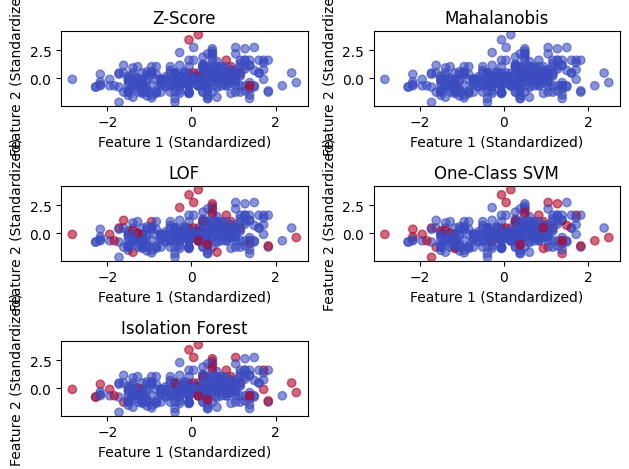

In [22]:
# Plot for each method
for i, method in enumerate(results.columns):
    plt.subplot(3, 2, i + 1)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=results[method], cmap='coolwarm', alpha=0.6)
    plt.title(method)
    plt.xlabel('Feature 1 (Standardized)')
    plt.ylabel('Feature 2 (Standardized)')

plt.tight_layout()
plt.show()

              precision    recall  f1-score   support

           0       0.54      0.99      0.70       160
           1       0.78      0.05      0.09       139

    accuracy                           0.55       299
   macro avg       0.66      0.52      0.40       299
weighted avg       0.65      0.55      0.42       299



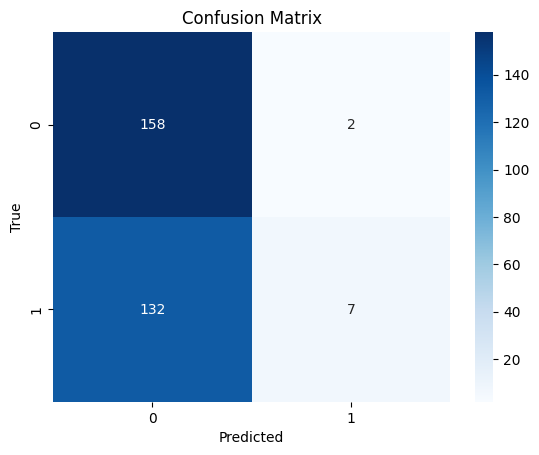

              precision    recall  f1-score   support

           0       0.54      1.00      0.70       160
           1       0.00      0.00      0.00       139

    accuracy                           0.54       299
   macro avg       0.27      0.50      0.35       299
weighted avg       0.29      0.54      0.37       299



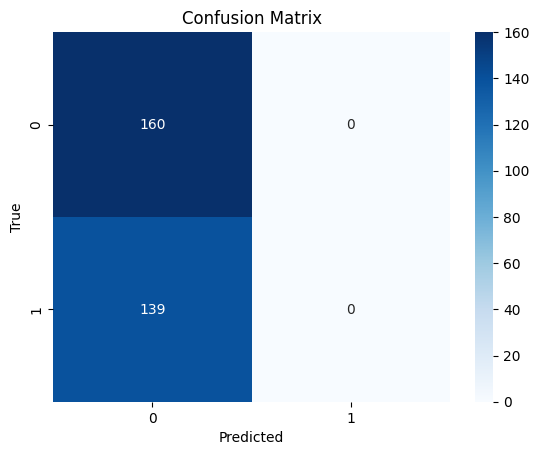

              precision    recall  f1-score   support

           0       0.55      0.92      0.69       160
           1       0.57      0.12      0.20       139

    accuracy                           0.55       299
   macro avg       0.56      0.52      0.44       299
weighted avg       0.56      0.55      0.46       299



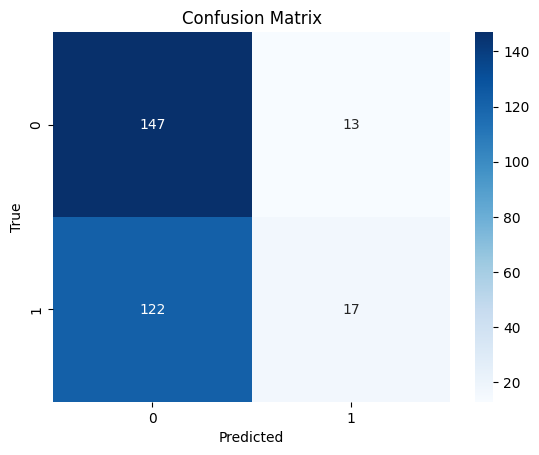

              precision    recall  f1-score   support

           0       0.56      0.91      0.69       160
           1       0.61      0.16      0.25       139

    accuracy                           0.56       299
   macro avg       0.58      0.54      0.47       299
weighted avg       0.58      0.56      0.49       299



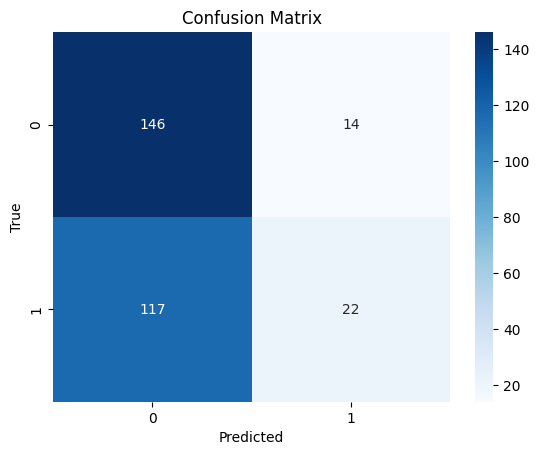

              precision    recall  f1-score   support

           0       0.55      0.93      0.69       160
           1       0.63      0.14      0.22       139

    accuracy                           0.56       299
   macro avg       0.59      0.53      0.46       299
weighted avg       0.59      0.56      0.48       299



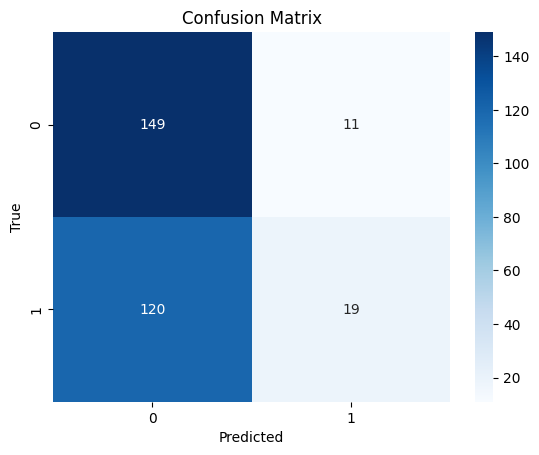

In [25]:
# Ensure the necessary imports are included
from sklearn.metrics import classification_report, confusion_matrix

# Quantitative Evaluation
def evaluate_anomalies(y_true, anomalies):
    print(classification_report(y_true, anomalies))
    cm = confusion_matrix(y_true, anomalies)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Evaluate each method using the target variable
for method in results.columns:
    evaluate_anomalies(y, results[method])
